In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tests = pd.read_csv('tests.csv')
utility = pd.read_csv('utility.csv')
train = pd.read_csv('train.csv')
welfare = pd.read_csv('welfare.csv')

# Insert Revenue and Regret from test_data into train_data
train.update(tests)

In [3]:
# Find max utility over all misreports
util = utility.groupby(['Iter','Agent','Noise','Clip','Exp'])['Utility'].max()

# Transform to df with index/columns
util_data = pd.DataFrame(pd.DataFrame(util).to_records()) 

In [4]:
# Find max regret over all misreports
reg = utility.groupby(['Iter','Agent','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_data = pd.DataFrame(pd.DataFrame(reg).to_records()) 

In [5]:
# Find min revenue over all misreports
tr = train.groupby(['Iter','Noise','Clip','Exp'])['Revenue'].min()

# Transform to df with index/columns
train_data = pd.DataFrame(pd.DataFrame(tr).to_records())

In [6]:
# Find max regret over all misreports
reg_s = train.groupby(['Iter','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_sum_data = pd.DataFrame(pd.DataFrame(reg_s).to_records())

In [7]:
# Find min welfare over all misreports
wel = welfare.groupby(['Iter','Noise','Clip','Exp'])['Welfare'].min()

# Transform to df with index/columns
wel_data = pd.DataFrame(pd.DataFrame(wel).to_records()) 

### Note: Data of four experiments, using the same valuations, has been concatenated to show the spread resulting from the non-determinism of training

#### Concatenation was done like this:
```
train1 = pd.read_csv('exp1/train.csv')
train = pd.concat([train1, ...])
train.to_csv("train.csv")
```

# Welfare
#### Min summed allocative welfare (w/o transfers) over all misreports of Agent0

With increasing noise, allocative welfare gets lowered as it (hypothetically: more detailed analysis necessary) approaches a lottery

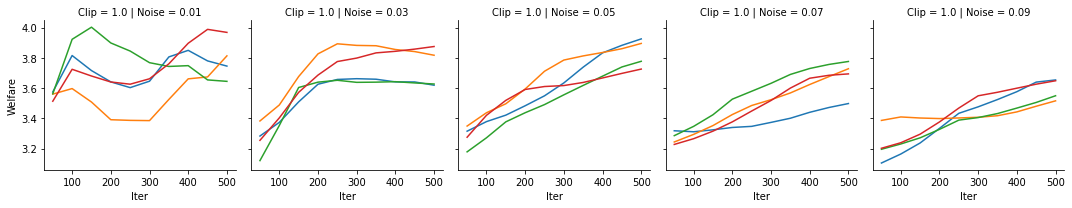

In [8]:
w = sns.FacetGrid(wel_data, col='Noise', row='Clip', hue='Exp')
w = w.map(plt.plot, 'Iter', 'Welfare')

# Revenue
#### Min revenue over all misreports of Agent0

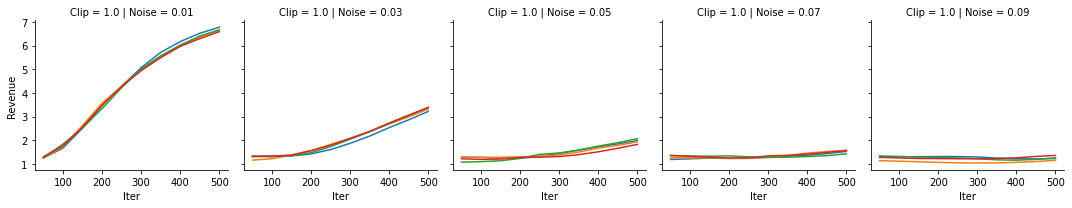

In [9]:
rev = sns.FacetGrid(train_data, col='Noise', row='Clip', hue='Exp')
rev = rev.map(plt.plot, 'Iter', 'Revenue')

# Sum Regret
#### Max sum regret over all misreports of Agent0

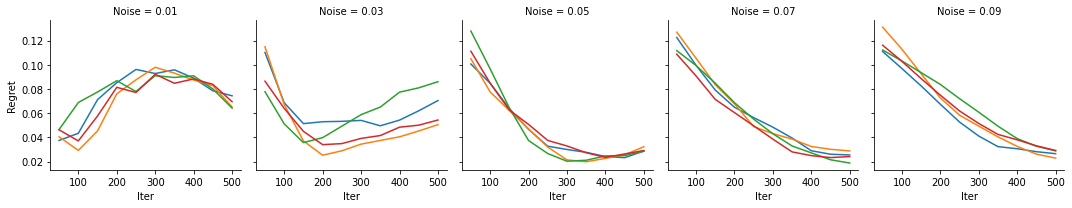

In [10]:
reg_sum = sns.FacetGrid(reg_sum_data, col='Noise', hue='Exp')
reg_sum = reg_sum.map(plt.plot, 'Iter', 'Regret')

# Regret Agent0
#### Max regret of Agent0 over all misreports

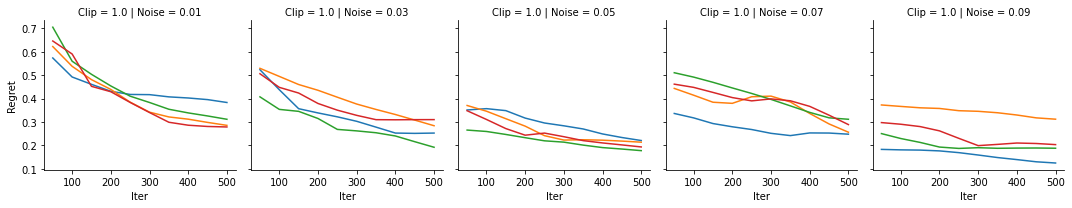

In [11]:
reg0 = sns.FacetGrid(reg_data.query('Agent == 0'), col='Noise', row='Clip', hue='Exp')
reg0 = reg0.map(plt.plot, 'Iter', 'Regret')

# Utility All Agents
#### Max Utility over all misreports
With increasing noise, the ratio with which Agent0 can outperform the other agents by misreporting lowers

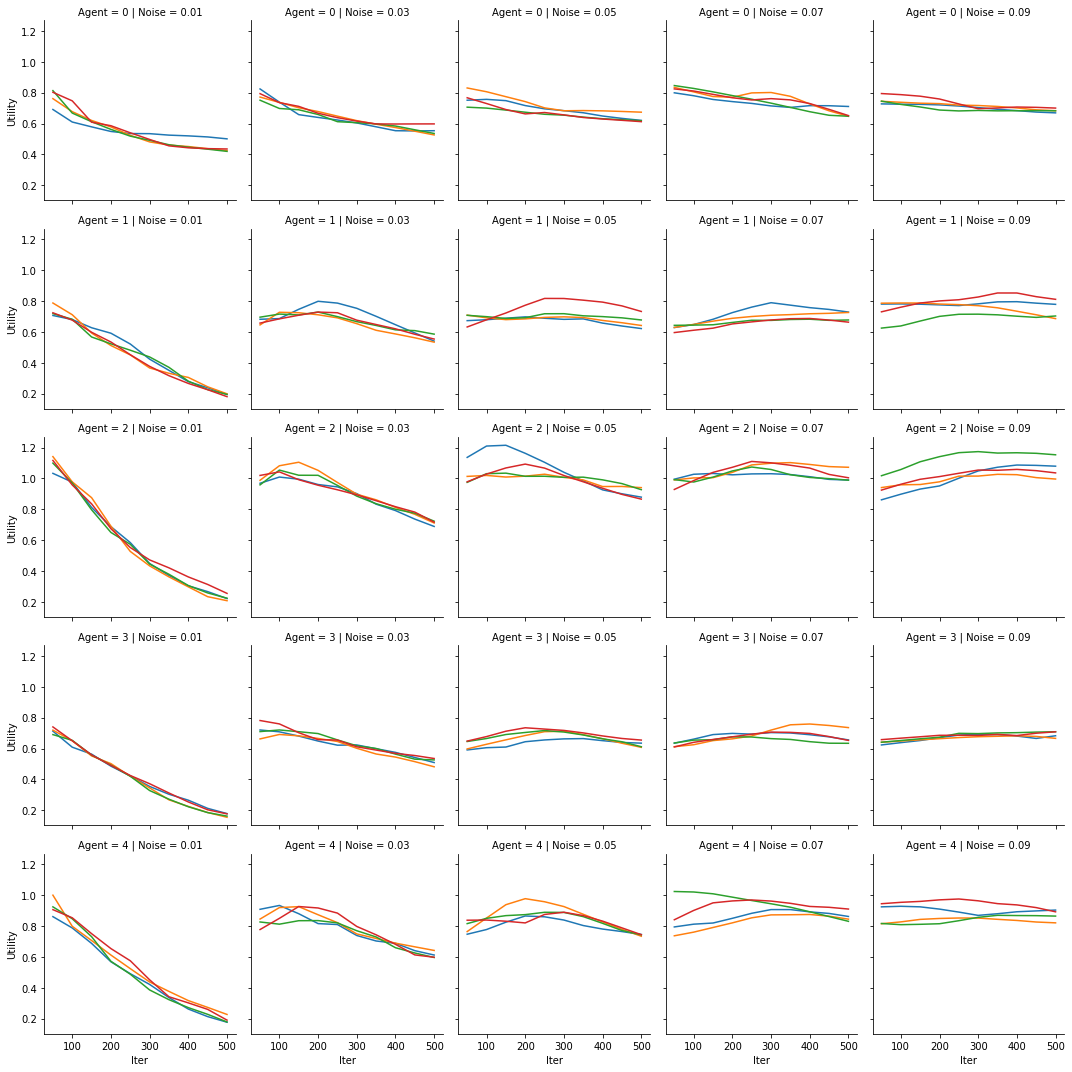

In [12]:
a = sns.FacetGrid(util_data, col='Noise', row='Agent', hue='Exp')
a = a.map(plt.plot, 'Iter', 'Utility')

# Preliminary Analysis

In low noise settings, we have high regret and slow convergence, since the mechanism learner is not robust.

In intermediate noise settings, we get better-than-lottery welfare and revenue, as well as lower regret and faster convergence than with the non-robust learner.

In high noise settings, we approach a lottery, resulting in worse allocative welfare and revenue, but low regret.